In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [40]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
len(X_train)

60000

In [42]:
len(X_test)

10000

In [43]:
X_train[0].shape

(28, 28)

In [44]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

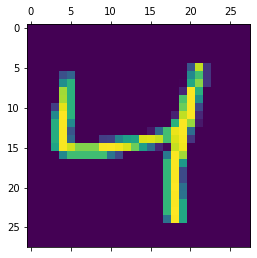

In [45]:
plt.matshow(X_train[2])

In [46]:
y_train[2]

4

In [47]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [48]:
X_train = X_train/255
X_test = X_test/255

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [51]:
X_train_flattened.shape

(60000, 784)

In [52]:
X_test_flattened.shape

(10000, 784)

In [53]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [54]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

2021-10-26 17:11:58.254101: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4646 - accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3040 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2729 - accuracy: 0.92 - 17s 9ms/step - loss: 0.2729 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2671 - accuracy: 0.9252


In [55]:
model.evaluate(X_test_flattened, y_test)

2021-10-26 17:14:15.927989: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 7ms/step - loss: 0.2720 - accuracy: 0.9253


[0.2719821333885193, 0.9253000020980835]

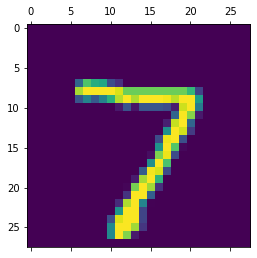

In [56]:
plt.matshow(X_test[0])

In [80]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([7.1769685e-02, 2.7814806e-03, 7.2624797e-01, 9.7715318e-01,
       1.2290259e-05, 1.6357005e-03, 7.7856999e-10, 9.9999803e-01,
       3.1039518e-01, 3.4676826e-01], dtype=float32)

In [81]:
np.argmax(y_predicted[0])

7

In [82]:
y_test[0]

7

In [83]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [84]:
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    1,    3,    1,    2,    2,    1,    2],
       [   0, 1124,    4,    1,    0,    1,    2,    0,    3,    0],
       [   5,    4, 1008,    4,    1,    0,    1,    6,    2,    1],
       [   0,    0,    4,  981,    1,   12,    0,    5,    5,    2],
       [   1,    0,    6,    0,  961,    0,    2,    3,    1,    8],
       [   2,    0,    0,    5,    1,  874,    2,    1,    6,    1],
       [   3,    3,    2,    1,    6,    9,  926,    2,    6,    0],
       [   1,    5,    6,    5,    0,    0,    0, 1005,    1,    5],
       [   2,    1,    5,    6,    1,    7,    1,    2,  949,    0],
       [   4,    4,    0,    7,   15,    1,    0,   11,    7,  960]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

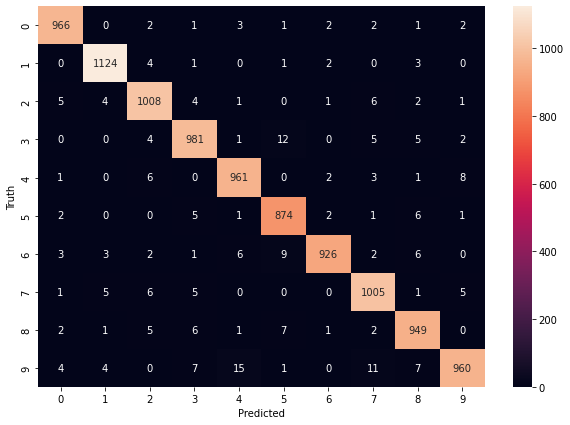

In [85]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2713 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1212 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0846 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0644 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0504 - accuracy: 0.9850


In [76]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0787 - accuracy: 0.9754 0s - l


[0.07868046313524246, 0.9753999710083008]

Text(69.0, 0.5, 'Truth')

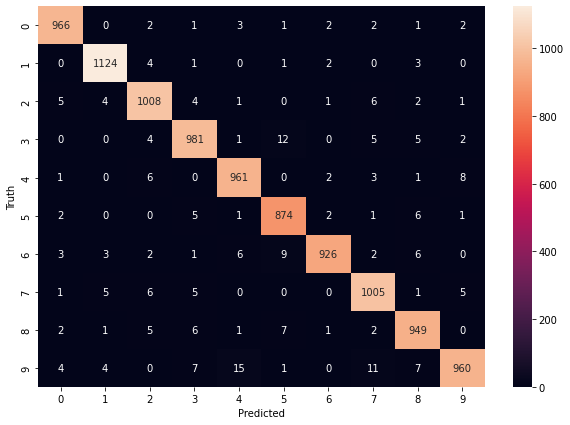

In [87]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels )
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2703 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1245 - accuracy: 0.96310s - loss: 0.1247 
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0861 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0651 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0520 - accuracy: 0.9842


In [90]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0878 - accuracy: 0.9724


[0.0878157839179039, 0.9724000096321106]

Text(69.0, 0.5, 'Truth')

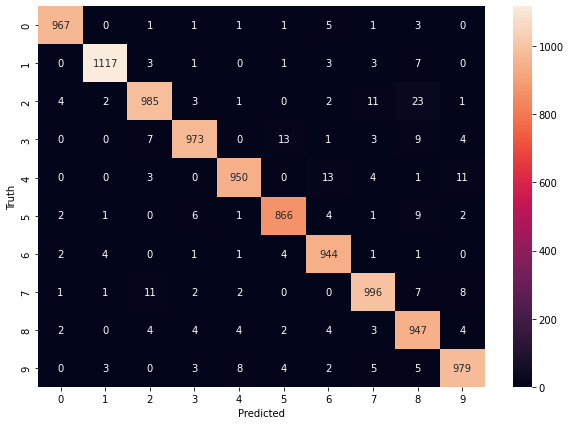

In [91]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels )
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')